# Activation likelihood estimation for coordinate-based meta-analysis

## NiMARE provides a variety of meta-analytic estimators, including ALE

In [1]:
from nimare.meta.cbma import ale
from nimare.correct import FWECorrector
from nimare.io import convert_sleuth_to_dataset

In [4]:
data = 'data/PainCoordinates1.txt'
dset = convert_sleuth_to_dataset(data)

In [6]:
meta = ale.ALE()
res = meta.fit(dset)
corr = FWECorrector(method='permutation', voxel_thresh=0.001, n_iters=100, n_cores=2)
cres = corr.transform(res)

/Users/Katie/Dropbox/Data/scripts/NiMARE/nimare/meta/cbma/ale.py:292: RuntimeWarning: divide by zero encountered in log
  clust_size, self.null_distributions['fwe_level-cluster'], 'upper'))


In [9]:
cres.save_maps(output_dir='data/out', prefix='pain', prefix_sep='_')

### We can visualize these results using nilearn's plotting tools.

In [10]:
from nilearn.plotting import plot_stat_map

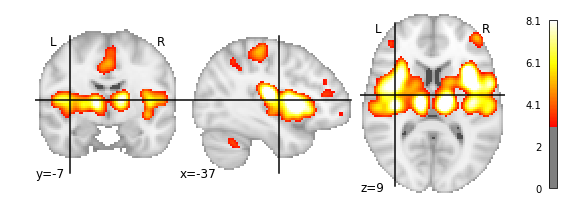

In [16]:
# p = 0.001 => Z = 3.09
plot_stat_map('data/out/pain_z.nii.gz', threshold=3.09)